In [8]:
from my_functions import*

In [9]:
file= uproot.open("/home/ruben/Escritorio/BachelorThesisRuben/Data/Muon_trees.root") #opening the Root file with Uproot 

In [10]:
MuonTree_ZeroBias=file["MuonTree_ZeroBias;1"]
MuonTree_Zmumu=file["MuonTree_Zmumu;1"]

#Select range of events
nmin1=0
nmax1=10000

#Select quality 0 Z->mumu
Zmumu_pt=quality_selector_with_empty(MuonTree_Zmumu["muon_quality"].array(),MuonTree_Zmumu["muon_pt"].array(),0)[nmin1:nmax1]
Zmumu_eta=quality_selector_with_empty(MuonTree_Zmumu["muon_quality"].array(),MuonTree_Zmumu["muon_eta"].array(),0)[nmin1:nmax1]
Zmumu_phi=quality_selector_with_empty(MuonTree_Zmumu["muon_quality"].array(),MuonTree_Zmumu["muon_phi"].array(),0)[nmin1:nmax1]

#And select the Z peak pairs
Zmumu_pt, Zmumu_eta, Zmumu_phi= get_all_Z_peak_pairs(Zmumu_pt,Zmumu_eta,Zmumu_phi)

nmin2=0
nmax2=100000
ZeroBias_eta=energy_cut_with_empty(MuonTree_ZeroBias["muon_pt"].array(), MuonTree_ZeroBias["muon_eta"].array())[nmin2:nmax2]
ZeroBias_phi=energy_cut_with_empty(MuonTree_ZeroBias["muon_pt"].array(), MuonTree_ZeroBias["muon_phi"].array())[nmin2:nmax2]
ZeroBias_pt=energy_cut_with_empty(MuonTree_ZeroBias["muon_pt"].array(), MuonTree_ZeroBias["muon_pt"].array())[nmin2:nmax2]

100%|██████████| 10000/10000 [00:12<00:00, 824.37it/s]


In [11]:
#Compute isolations
dr_min=0.1
dr_max=1.5

res1=muon_isolation_all_events(MuonTree_Zmumu, Zmumu_eta, Zmumu_phi, dr_min, dr_max, event_range=[nmin1, nmax1])
res2=muon_isolation_all_events(MuonTree_ZeroBias, ZeroBias_eta, ZeroBias_phi, dr_min, dr_max, [nmin2, nmax2])

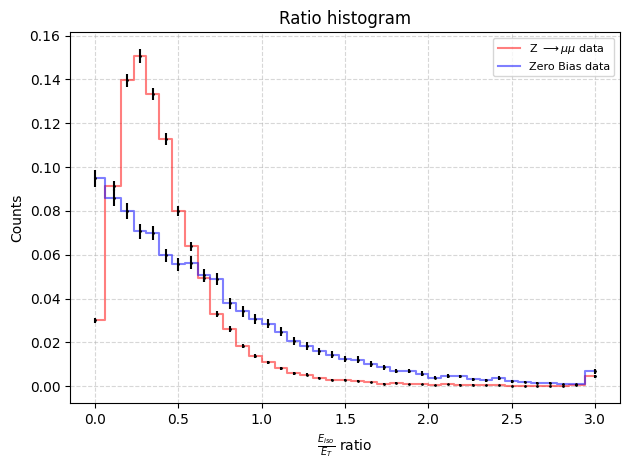

In [12]:
# Compute ratios and number of muons
r1 = ak.flatten(res1) / ak.flatten(Zmumu_pt)
l1 = len(r1[~np.isnan(r1)])

r2 = ak.flatten(res2) / ak.flatten(ZeroBias_pt)
l2 = len(r2[~np.isnan(r2)])

bins = np.linspace(0, 2, 40)

coolplot([r1, r2], np.linspace(0,3,40), x_label=r"$\frac{E_{iso}}{E_T}$ ratio", y_label="Counts",
         title="Ratio histogram")